In [1]:
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
pd.set_option("display.max_colwidth",100)
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
train_data=pd.read_csv("train_tweets.csv")
test_data=pd.read_csv("test_tweets.csv")

In [3]:
train_data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. ...
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. ...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation


In [4]:
train_data["text_length"]=train_data["tweet"].apply(lambda x: len(x)-x.count(" "))
test_data["text_length"]=test_data["tweet"].apply(lambda x: len(x)-x.count(" "))

In [5]:
def count_punct(text):
    count=sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text)-text.count(" ")),2)*100
train_data["punct%"]=train_data["tweet"].apply(lambda x:count_punct(x))
test_data["punct%"]=test_data["tweet"].apply(lambda x:count_punct(x))
train_data.head()

,id,label,tweet,text_length,punct%
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. ...,82,4.0
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. ...,101,8.0
2,3,0,bihday your majesty,17,0.0
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,70,6.0
4,5,0,factsguide: society now #motivation,32,6.0


C:\Users\Rahul Singh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


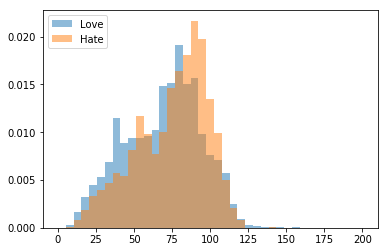

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
bins=np.linspace(0,200,40)
plt.hist(train_data[train_data["label"]==0]["text_length"],bins,normed=True,alpha=0.5,label="Love")
plt.hist(train_data[train_data["label"]==1]["text_length"],bins,normed=True,alpha=0.5,label="Hate")
plt.legend(loc="upper left")


In [7]:
sw=stopwords.words("english")

In [8]:
ps=nltk.PorterStemmer()
def clean_tweets(text):
    l="".join([char for char in text if char not in string.punctuation])
    w=re.split("\W+", l)
    te=" ".join([word.lower() for word in w if word.lower() not in sw])
    #text=" ".join([ps.stem(word) for word in te])
    return text

In [9]:
train_data["tweet"]=train_data["tweet"].apply(lambda x:clean_tweets(x))
test_data["tweet"]=test_data["tweet"].apply(lambda x:clean_tweets(x))

In [10]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y, test_y=train_test_split(train_data["tweet"],train_data["label"], test_size=0.3, random_state=0)

In [11]:
vec=CountVectorizer()
train_x=vec.fit_transform(train_x)
test_x=vec.transform(test_x)

In [13]:
from sklearn.metrics import accuracy_score
mod=RandomForestClassifier()
mod.fit(train_x,train_y)
accuracy_score(test_y,mod.predict(test_x))

0.9588069663155699

In [14]:
model=SGDClassifier()
model.fit(train_x,train_y)
accuracy_score(test_y,model.predict(test_x))

C:\Users\Rahul Singh\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.9621441234748149

In [15]:
model=MultinomialNB()
model.fit(train_x,train_y)
accuracy_score(test_y,model.predict(test_x))

0.957034101574721